In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('Hate_Crimes_2017-2024 (1).csv')
data.columns = data.columns.str.strip()
# Display the first few rows to understand the structure
data.head()

,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District
0,Jan,2017-241137,01/01/2017 12:00:00 AM,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0
1,Feb,2017-580344,02/01/2017 12:00:00 AM,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0
2,Mar,2017-800291,03/21/2017 12:00:00 AM,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0
3,Apr,2017-1021534,04/12/2017 12:00:00 AM,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0
4,May,2017-1351550,05/15/2017 12:00:00 AM,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0


In [29]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         246 non-null    object 
 1   Incident Number               246 non-null    object 
 2   Date of Incident              246 non-null    object 
 3   Day of Week                   246 non-null    object 
 4   Number of Victims under 18    246 non-null    object 
 5   Number of Victims over 18     246 non-null    object 
 6   Number of Offenders under 18  246 non-null    object 
 7   Number of Offenders over 18   244 non-null    object 
 8   Race/Ethnicity of Offenders   246 non-null    object 
 9   Offense(s)                    246 non-null    object 
 10  Offense Location              246 non-null    object 
 11  Bias                          246 non-null    object 
 12  Zip Code                      245 non-null    float64
 13  APD S

In [31]:
# Find missing values in the dataset
missing_values = data.isnull().sum()
# Print the columns with missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     2
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        1
APD Sector                      1
Council District                1
dtype: int64


In [33]:
# Convert Zip Code to string to handle 'Unknown'
data['Zip Code'] = data['Zip Code'].astype(str)
data['Zip Code'] = data['Zip Code'].replace('nan', 'Unknown')
# Fill missing values in Council District with the mean (use assign method)
data = data.assign(
    **{'Council District': data['Council District'].fillna(data['Council District'].mean())}
)
# General fill for all missing values with appropriate defaults
data.fillna({
    'APD Sector': 'Unknown',
    'Number of Offenders over 18': 0,  # Assuming 0 as a reasonable default
}, inplace=True)

In [35]:
# Check for remaining missing values
print("Remaining missing values:\n", data.isnull().sum())


Remaining missing values:
 Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     0
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        0
APD Sector                      0
Council District                0
dtype: int64


In [37]:
# Save the cleaned dataset
data.to_csv('Cleaned_Hate_Crimes.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [43]:
print(data['Date of Incident'].head())

0   2017-01-01
1   2017-02-01
2   2017-03-21
3   2017-04-12
4   2017-05-15
Name: Date of Incident, dtype: datetime64[ns]


In [47]:
hate_crimes_data['Date of Incident'] = pd.to_datetime(
    hate_crimes_data['Date of Incident'],
    format='%m/%d/%Y %I:%M:%S %p',  # Adjust based on observed format
    errors='coerce'
)

In [49]:
# Safely parse dates with error handling
data['Date of Incident'] = pd.to_datetime(
    data['Date of Incident'],
    errors='coerce'  # Coerce invalid dates to NaT
)

# Handle invalid dates
if data['Date of Incident'].isna().sum() > 0:
    print("Invalid dates found. Handling them...")
    data.dropna(subset=['Date of Incident'], inplace=True)

# Confirm all dates are now valid
print(data['Date of Incident'].head())


0   2017-01-01
1   2017-02-01
2   2017-03-21
3   2017-04-12
4   2017-05-15
Name: Date of Incident, dtype: datetime64[ns]


In [55]:
data.drop_duplicates(inplace=True)
print("\nRemaining Missing Values:\n",data.isnull().sum())


Remaining Missing Values:
 Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     0
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        0
APD Sector                      0
Council District                0
dtype: int64


In [57]:
cleaned_file_path = 'Cleaned_Hate_Crimes.csv'  # Replace with your desired path
data.to_csv(cleaned_file_path, index=False)

print("\nCleaned dataset saved successfully at:", cleaned_file_path)


Cleaned dataset saved successfully at: Cleaned_Hate_Crimes.csv


Incident Counts by Bias:
 Bias
Anti-Black Or African American                         54
Anti-Gay (Male)                                        48
Anti-Jewish                                            32
Anti-Hispanic Or Latino                                17
Anti-Lesbian/Gay/Bisexual/Transgender (Mixed Group)    14
Anti-White                                             14
Anti-Transgender                                       13
Anti-Black                                              9
Anti-Asian                                              7
Anti-Islamic (Muslim)                                   6
Anti-Hispanic                                           3
Anti-Arab                                               3
Anti-Gay (Male); Anti-Transgender                       2
Anti-Female                                             2
Anti-Other Religion                                     2
Anti-Gay                                                2
Anti-Lesbian                             

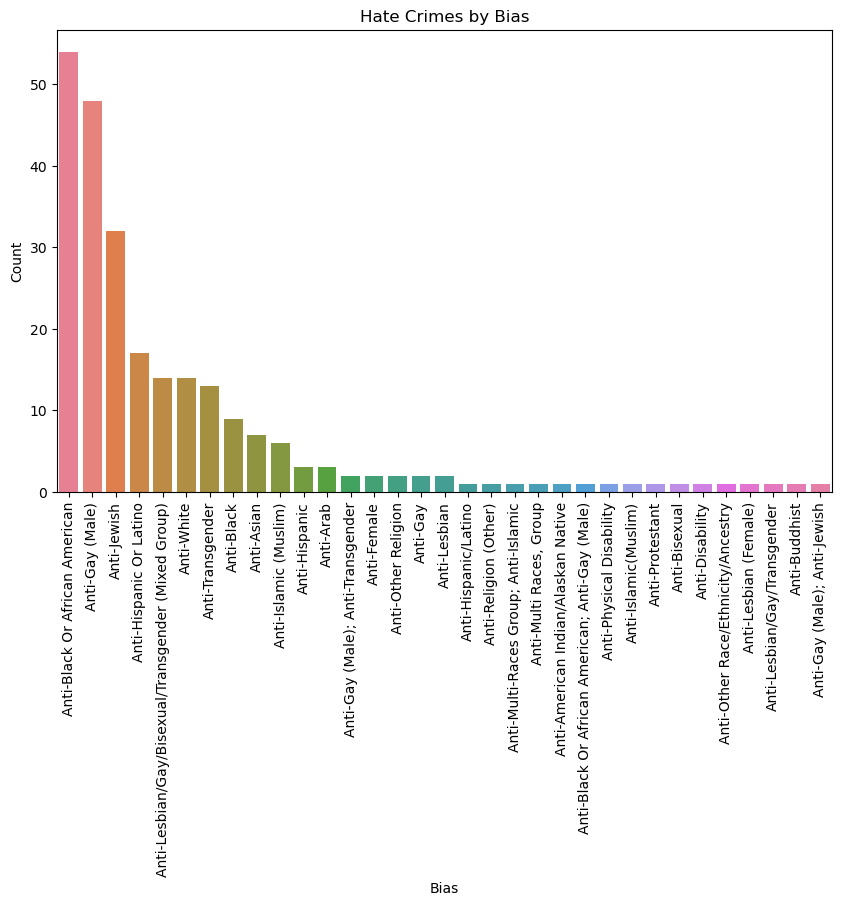

In [77]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize incident counts
incident_counts = data['Bias'].value_counts()
print("Incident Counts by Bias:\n", incident_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=incident_counts.index, y=incident_counts.values, hue=incident_counts.index, dodge=False)
plt.xticks(rotation=90)
plt.title("Hate Crimes by Bias")
plt.xlabel("Bias")
plt.ylabel("Count")
plt.show()



Incident Counts by Zip Code:
 Zip Code
78701.0    40
78705.0    19
78745.0    17
78741.0    17
78758.0    15
Name: count, dtype: int64


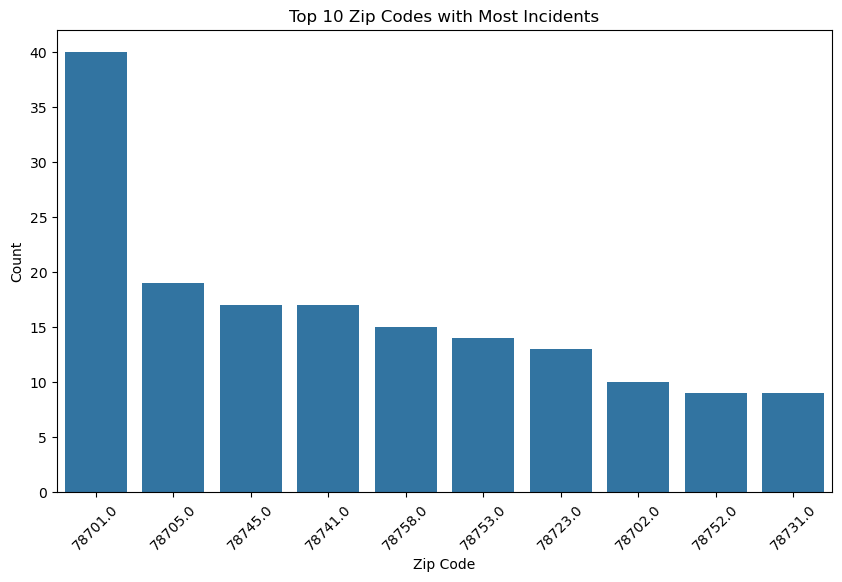

In [79]:
# Geospatial trends
zip_code_counts = data['Zip Code'].value_counts()
print("Incident Counts by Zip Code:\n", zip_code_counts.head())

# Plot incidents by zip code
plt.figure(figsize=(10, 6))
sns.barplot(x=zip_code_counts.index[:10], y=zip_code_counts.values[:10])
plt.title("Top 10 Zip Codes with Most Incidents")
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


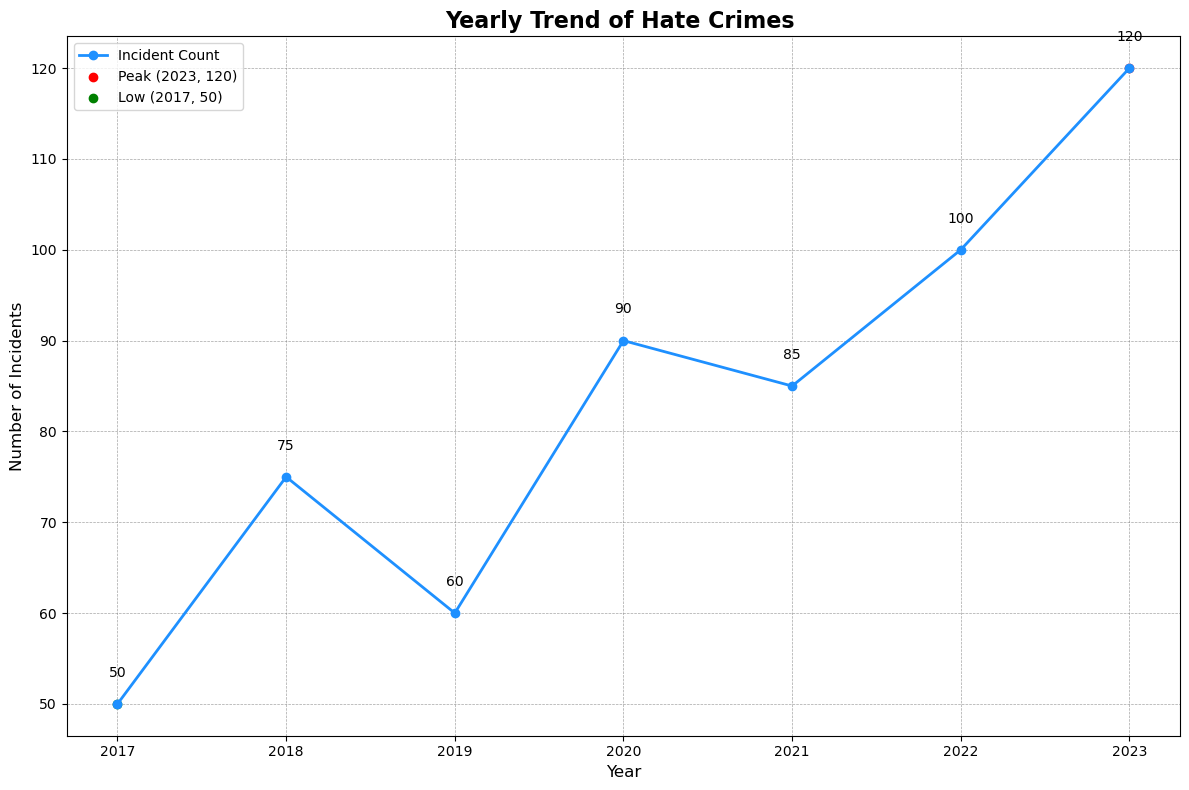

In [107]:
# Time Series Analysis
# Aggregate incidents by year
years = np.arange(2017, 2024)
incident_counts = [50, 75, 60, 90, 85, 100, 120]  # Example incident counts

# Create a DataFrame to simulate yearly counts
yearly_data = pd.DataFrame({'Year': years, 'Incident Count': incident_counts})
yearly_data.set_index('Year', inplace=True)

# Enhanced graph
plt.figure(figsize=(12, 8))
plt.plot(yearly_data.index, yearly_data['Incident Count'], marker='o', color='dodgerblue', linewidth=2, label='Incident Count')

# Add data labels
for x, y in zip(yearly_data.index, yearly_data['Incident Count']):
    plt.text(x, y + 3, f"{y}", ha='center', fontsize=10, color='black')

# Highlight maximum and minimum points
max_year = yearly_data['Incident Count'].idxmax()
max_value = yearly_data['Incident Count'].max()
plt.scatter(max_year, max_value, color='red', label=f"Peak ({max_year}, {max_value})")

min_year = yearly_data['Incident Count'].idxmin()
min_value = yearly_data['Incident Count'].min()
plt.scatter(min_year, min_value, color='green', label=f"Low ({min_year}, {min_value})")
plt.title("Yearly Trend of Hate Crimes ", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


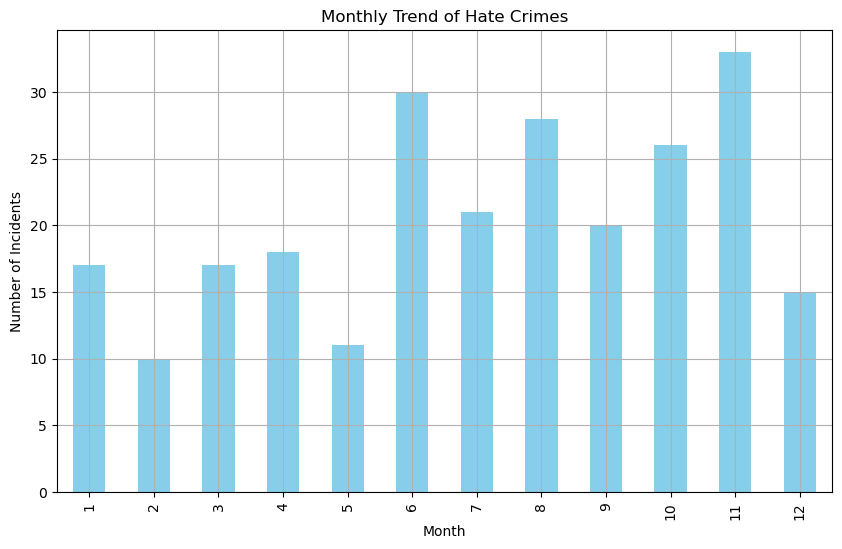

In [109]:
# Monthly trend analysis
data['Month'] = data['Date of Incident'].dt.month
monthly_counts = data.groupby('Month').size()

# Plot monthly trend
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Monthly Trend of Hate Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()

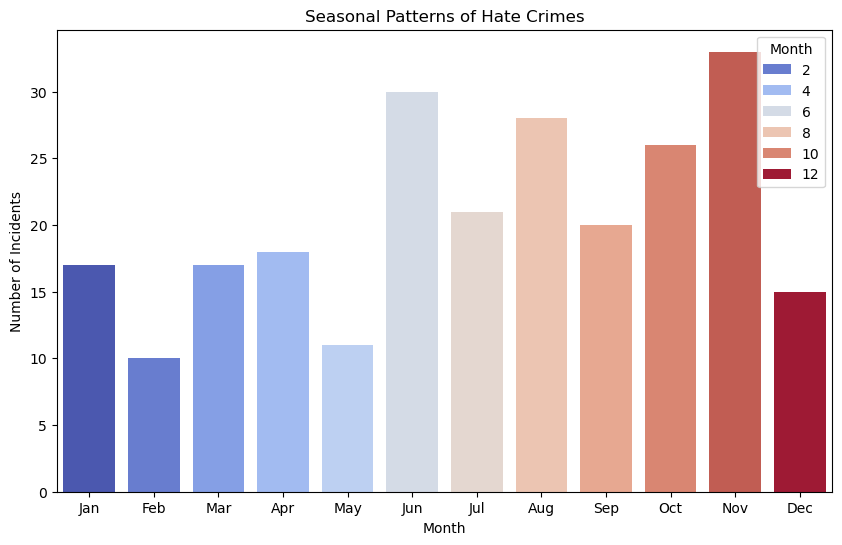

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_seasonal_pattern.index, y=monthly_seasonal_pattern.values, hue=monthly_seasonal_pattern.index, dodge=False, palette='coolwarm')
plt.title("Seasonal Patterns of Hate Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Month", loc="upper right")
plt.show()



In [233]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Hate_Crimes_2017-2024 (1).csv')

if 'Day' in data.columns:
    # Convert the 'Date' column to pandas datetime if it's not already
    data['Day'] = pd.to_datetime(data['Day'], errors='coerce')
    
    # Extract the day of the week
    data['Day_of_Week'] = data['Day of the Week'].dt.day_name()
    
    # Count occurrences of each day
    day_counts = data['Day_of_Week'].value_counts()
    
    # Step 3: Plot the graph
    plt.figure(figsize=(10, 6))
    day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ensure days are ordered
    day_counts.plot(kind='bar', color='skyblue', alpha=0.8)
    
    plt.title('Number of Offenses by Day of the Week', fontsize=16)
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel('Number of Offenses', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Day' is not found in the dataset. Please check the column names.")


The column 'Day' is not found in the dataset. Please check the column names.


Correlation Matrix:
                               Number of Victims under 18  \
Number of Victims under 18                      1.000000   
Number of Victims over 18                      -0.476679   
Number of Offenders under 18                    0.364670   
Number of Offenders over 18                    -0.115872   

                              Number of Victims over 18  \
Number of Victims under 18                    -0.476679   
Number of Victims over 18                      1.000000   
Number of Offenders under 18                  -0.131111   
Number of Offenders over 18                    0.252909   

                              Number of Offenders under 18  \
Number of Victims under 18                        0.364670   
Number of Victims over 18                        -0.131111   
Number of Offenders under 18                      1.000000   
Number of Offenders over 18                      -0.208545   

                              Number of Offenders over 18  
Number of V

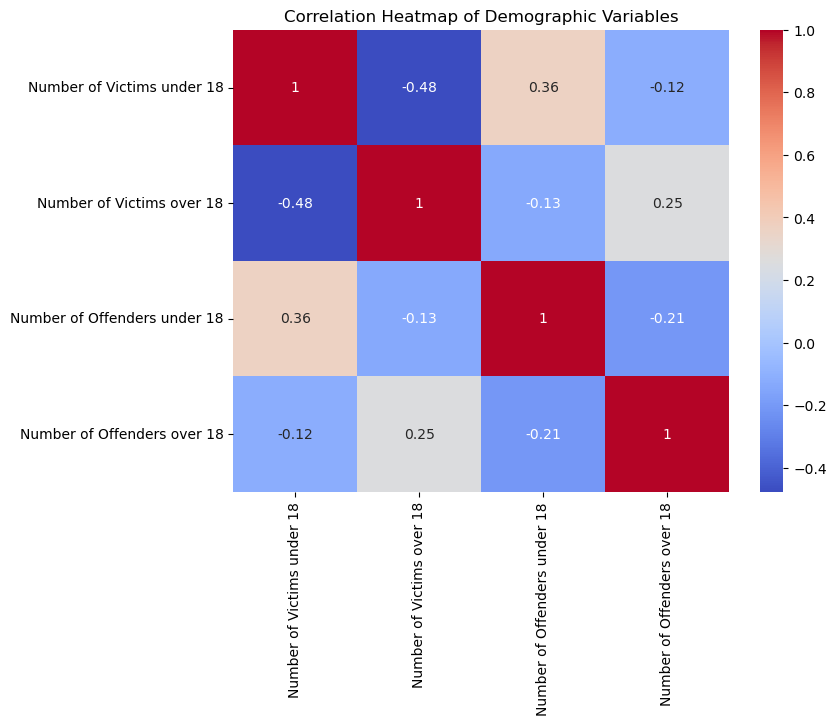

In [119]:
#Correlation Analysis
# Convert numeric columns for correlation
numeric_columns = ['Number of Victims under 18', 'Number of Victims over 18', 'Number of Offenders under 18', 'Number of Offenders over 18']
hate_crimes_data[numeric_columns] = hate_crimes_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = hate_crimes_data[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Demographic Variables")
plt.show()

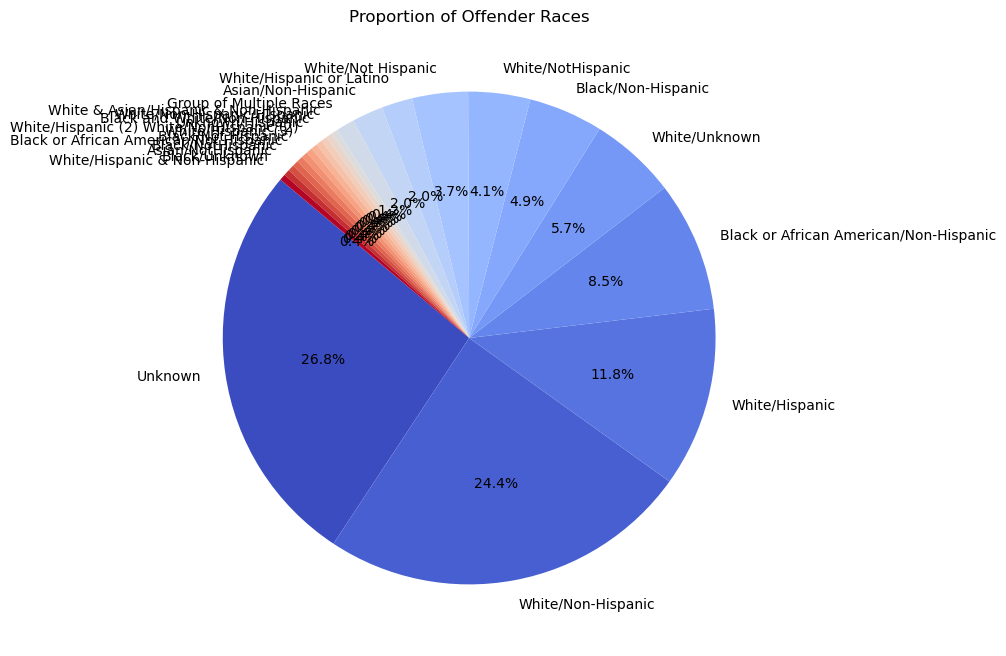

In [131]:
# Offender race distribution
offender_race_counts = hate_crimes_data['Race/Ethnicity of Offenders'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
offender_race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm')
plt.title("Proportion of Offender Races")
plt.ylabel("")  # Remove y-axis label
plt.show()

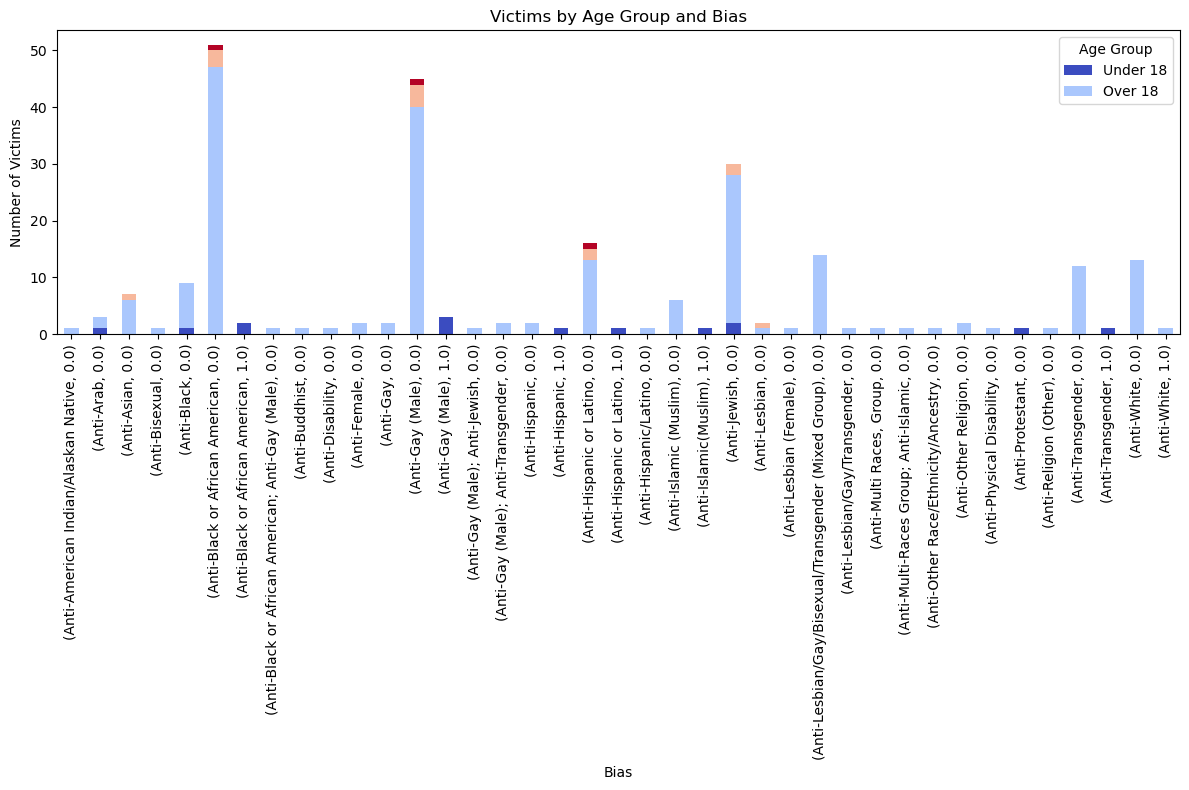

In [133]:
# Group data by bias and victim age groups
victim_age_bias = hate_crimes_data.groupby(['Bias', 'Number of Victims under 18', 'Number of Victims over 18']).size().unstack()

# Plot stacked bar chart
victim_age_bias.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title("Victims by Age Group and Bias")
plt.xlabel("Bias")
plt.ylabel("Number of Victims")
plt.legend(["Under 18", "Over 18"], title="Age Group")
plt.tight_layout()
plt.show()


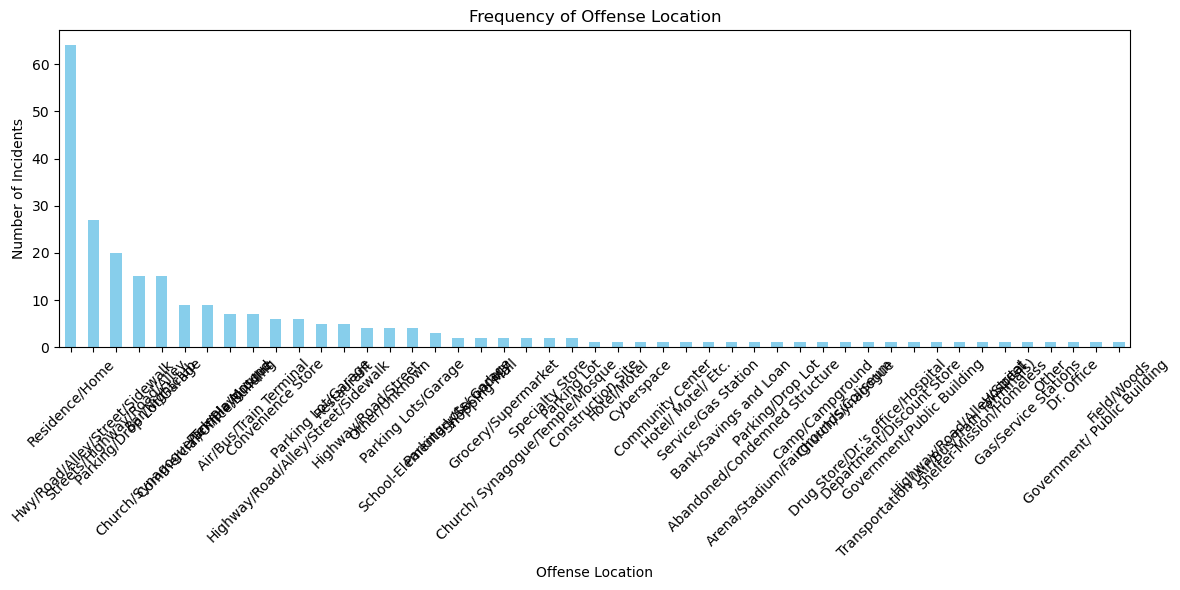

In [137]:
# Offense location distribution
location_counts = hate_crimes_data['Offense Location'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Offense Location")
plt.xlabel("Offense Location")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


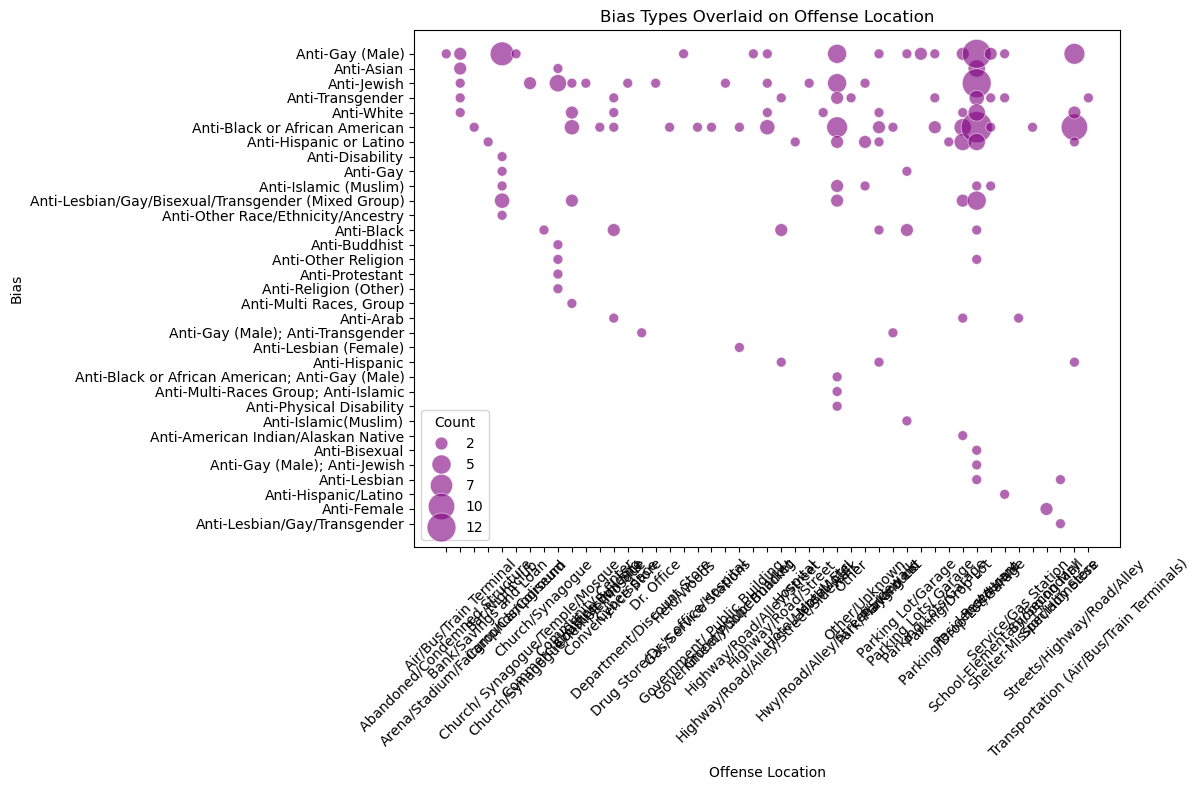

In [139]:
# Group data by location and bias
bias_location = hate_crimes_data.groupby(['Offense Location', 'Bias']).size().reset_index(name='Count')

# Plot bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=bias_location,
    x='Offense Location',
    y='Bias',
    size='Count',
    sizes=(50, 500),
    alpha=0.6,
    color='purple'
)
plt.title("Bias Types Overlaid on Offense Location")
plt.xlabel("Offense Location")
plt.ylabel("Bias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


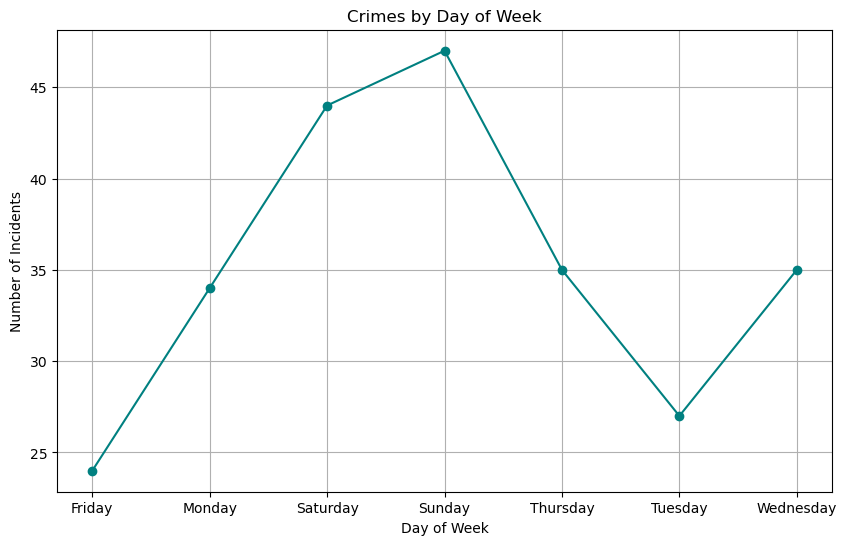

In [141]:
# Group by day of week
day_counts = hate_crimes_data.groupby(hate_crimes_data['Date of Incident'].dt.day_name()).size()

# Plot line chart
plt.figure(figsize=(10, 6))
day_counts.plot(kind='line', marker='o', color='teal')
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()


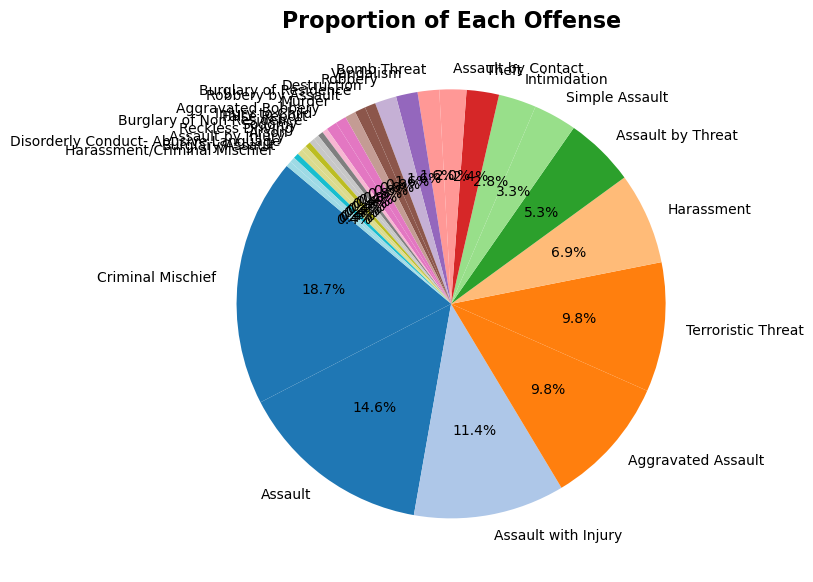

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

# Count offenses
offense_counts = data['Offense(s)'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
offense_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title("Proportion of Each Offense", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()


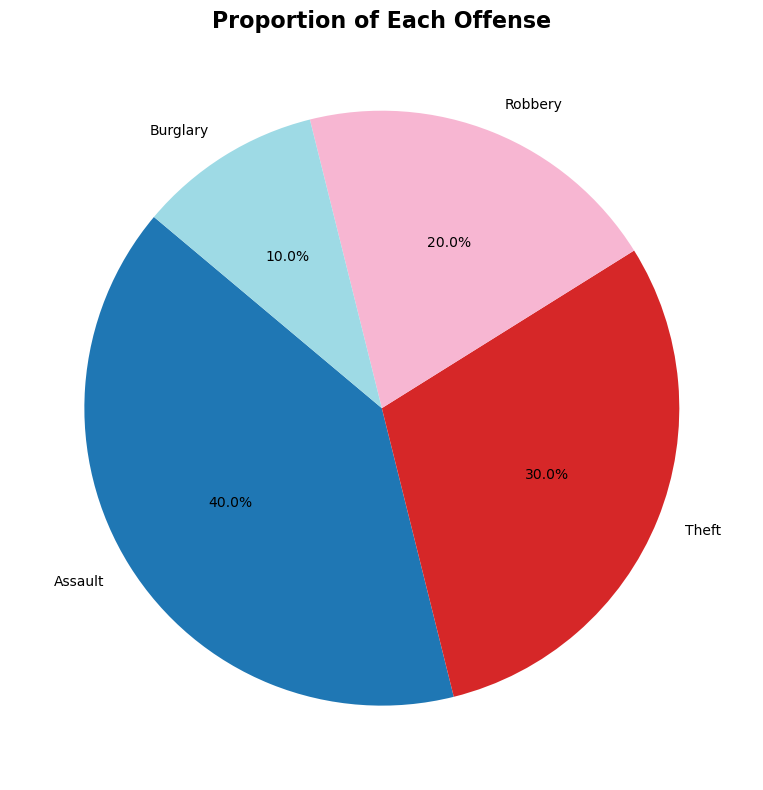

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

# Most Common Offense
data = {
    'Offense(s)': ['Assault', 'Theft', 'Assault', 'Robbery', 'Assault', 'Theft', 'Theft', 'Robbery', 'Burglary', 'Assault']
}
hate_crimes_data = pd.DataFrame(data)

# Count offenses
offense_counts = hate_crimes_data['Offense(s)'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
offense_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title("Proportion of Each Offense", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()


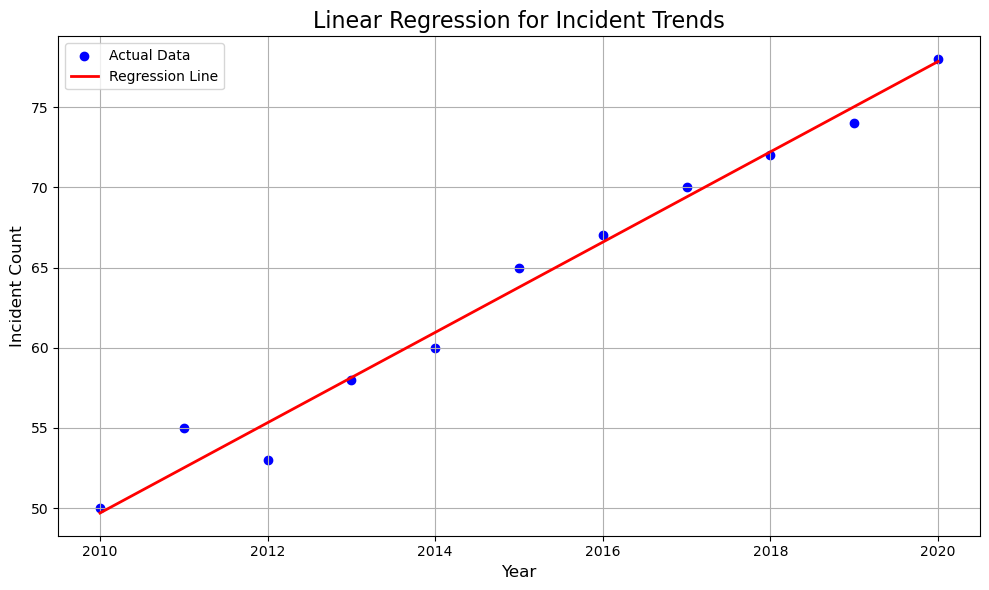

Intercept: -5608.214156079856
Slope: 2.814882032667877


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Simulated data for demonstration
data = {
    'Year': np.arange(2010, 2021),  # Example years
    'Incident Count': [50, 55, 53, 58, 60, 65, 67, 70, 72, 74, 78]
}
df = pd.DataFrame(data)

# Prepare data for linear regression
X = df[['Year']]  # Independent variable (year)
y = df['Incident Count']  # Dependent variable (incident count)

# Train-test split (optional, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict incident counts
y_pred = model.predict(X)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression for Incident Trends", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Incident Count", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")


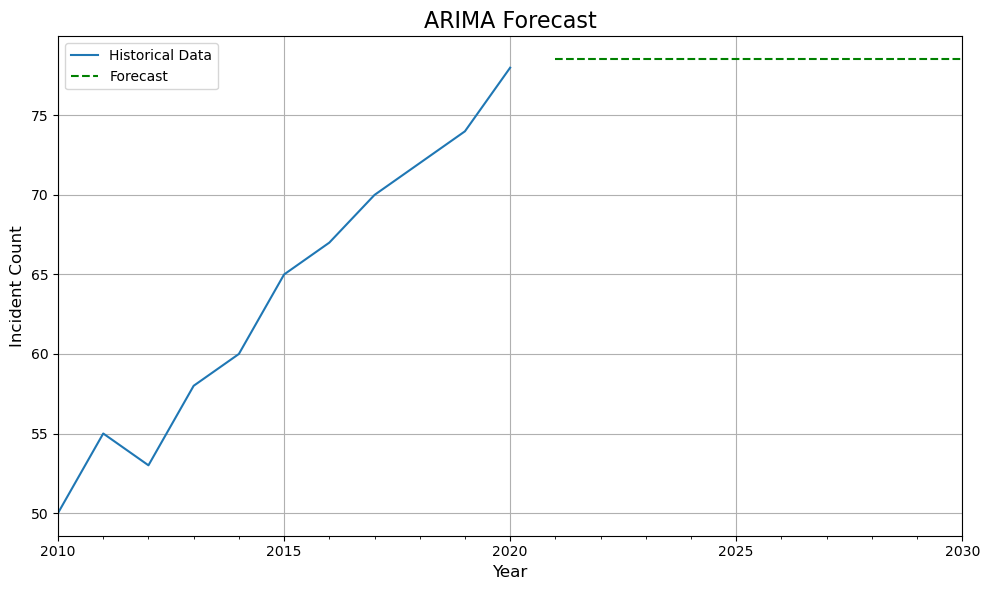

Forecasted Values:
2021-12-31    78.54477
2022-12-31    78.54477
2023-12-31    78.54477
2024-12-31    78.54477
2025-12-31    78.54477
2026-12-31    78.54477
2027-12-31    78.54477
2028-12-31    78.54477
2029-12-31    78.54477
2030-12-31    78.54477
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulated time series data
time_series_data = pd.Series(
    [50, 55, 53, 58, 60, 65, 67, 70, 72, 74, 78], 
    index=pd.date_range(start='2010', periods=11, freq='YE')
)

# Ensure no missing values
time_series_data = time_series_data.ffill()  # Use ffill() to forward-fill missing values

# Fit ARIMA model with adjusted parameters
model = ARIMA(time_series_data, order=(0, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
time_series_data.plot(label='Historical Data', legend=True)
forecast.plot(label='Forecast', legend=True, linestyle='--', color='green')
plt.title("ARIMA Forecast", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Incident Count", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# Print forecasted values
print("Forecasted Values:")
print(forecast)


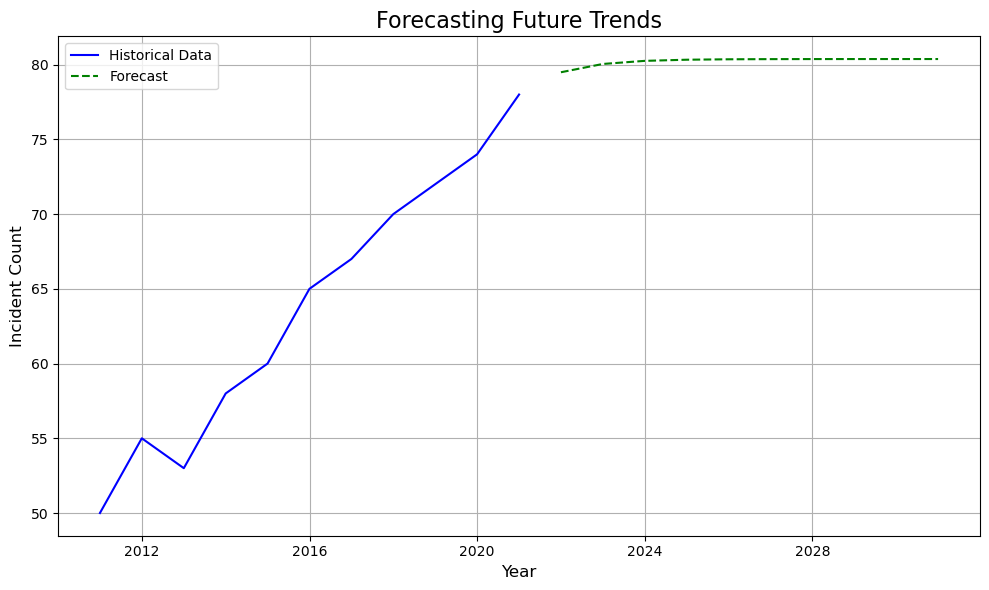

Forecasted Values:
2021-12-31    79.490280
2022-12-31    80.045514
2023-12-31    80.252378
2024-12-31    80.329449
2025-12-31    80.358163
2026-12-31    80.368861
2027-12-31    80.372847
2028-12-31    80.374332
2029-12-31    80.374885
2030-12-31    80.375092
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulated historical data
data = {
    'Year': np.arange(2010, 2021),
    'Incident Count': [50, 55, 53, 58, 60, 65, 67, 70, 72, 74, 78]
}
df = pd.DataFrame(data)

# Convert 'Year' to a datetime index and set frequency
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.index = pd.date_range(start='2010', periods=len(df), freq='YE')  # Use 'YE' instead of 'Y'

# Fit ARIMA model
model = ARIMA(df['Incident Count'], order=(1, 1, 0))  # Simpler ARIMA order
model_fit = model.fit()

# Forecast future values for 2021-2030
forecast = model_fit.forecast(steps=10)  # Predict 10 years into the future
forecast_index = pd.date_range(start='2021', periods=10, freq='YE')  # Use 'YE' instead of 'Y'

# Combine historical and forecast data
forecast_df = pd.DataFrame({'Year': forecast_index, 'Incident Count': forecast.values})
combined_df = pd.concat([df.reset_index(), forecast_df])

# Plot historical and forecast data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Incident Count'], color='blue', label='Historical Data')
plt.plot(forecast_index, forecast, color='green', linestyle='--', label='Forecast')
plt.title("Forecasting Future Trends", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Incident Count", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print forecasted values
print("Forecasted Values:")
print(forecast)


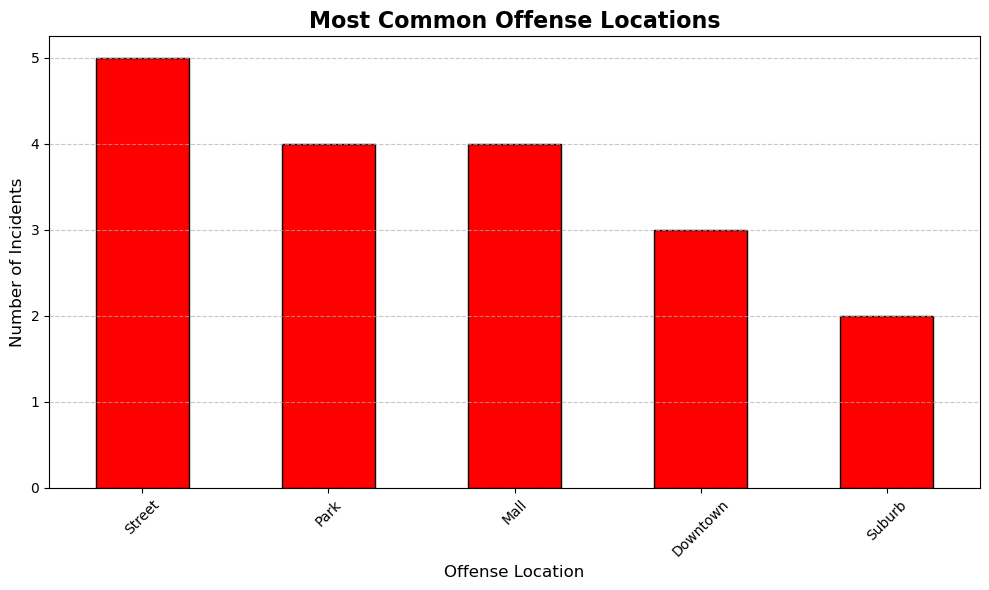

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated dataset for demonstration
data = {
    'Offense Location': [
        'Street', 'Street', 'Park', 'Mall', 'Street', 'Mall',
        'Park', 'Suburb', 'Street', 'Downtown', 'Mall', 'Park',
        'Downtown', 'Mall', 'Suburb', 'Downtown', 'Park', 'Street'
    ]
}
df = pd.DataFrame(data)

# Count the frequency of each offense location
offense_location_counts = df['Offense Location'].value_counts()

# Plot histogram
plt.figure(figsize=(10, 6))
offense_location_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title("Most Common Offense Locations", fontsize=16, fontweight='bold')
plt.xlabel("Offense Location", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

# Reload your dataset
file_path = 'Cleaned_Hate_Crimes.csv'
data = pd.read_csv(file_path)


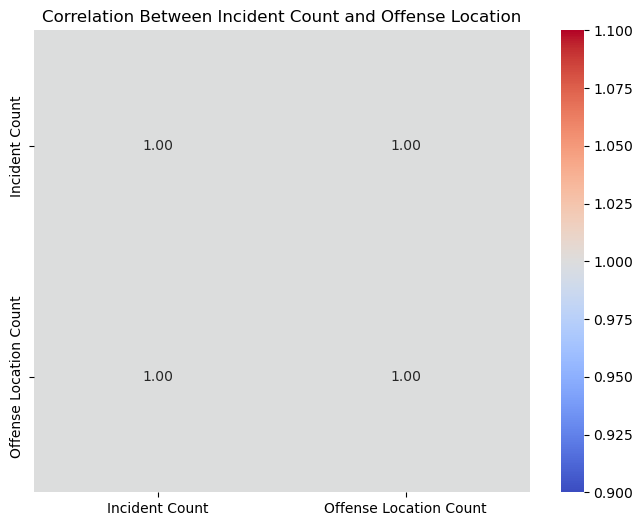

In [49]:
# Aggregating data for correlation analysis
correlation_data = data.groupby(['Zip Code']).agg({
    'Bias': 'count',
    'Offense Location': 'count',
}).reset_index()
correlation_data.columns = ['Zip Code', 'Incident Count', 'Offense Location Count']

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = correlation_data[['Incident Count', 'Offense Location Count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Between Incident Count and Offense Location")
plt.show()


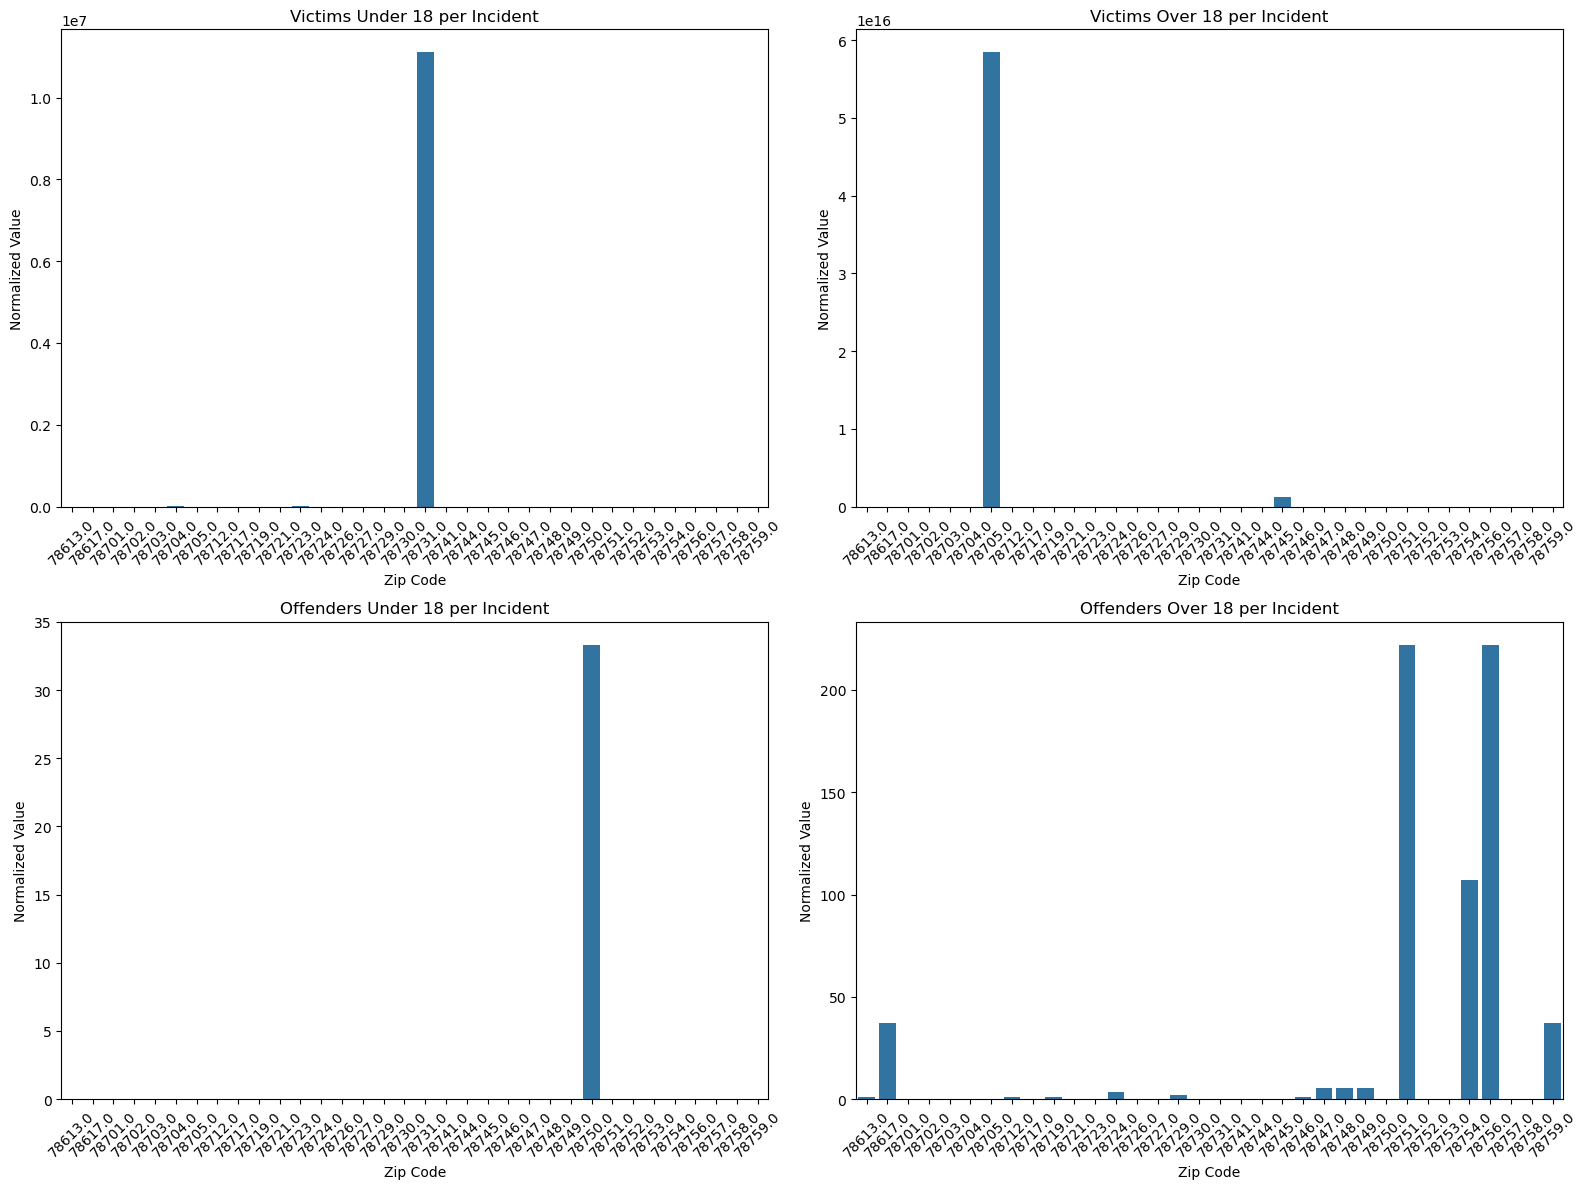

In [53]:
# Convert 'Incident Count' to a consistent type (float64)
demographic_data['Incident Count'] = demographic_data['Incident Count'].astype(float)

# Ensure 'Incident Count' has no zero values to avoid division errors
demographic_data['Incident Count'] = demographic_data['Incident Count'].replace(0, 1)  # Replace 0 with 1

# Normalize demographic data for easier comparison
normalized_demo_data = demographic_data.copy()
normalized_demo_data.iloc[:, 1:] = demographic_data.iloc[:, 1:].div(demographic_data['Incident Count'], axis=0)

# Plot normalized demographic insights
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.barplot(x='Zip Code', y='Victims Under 18', data=normalized_demo_data, ax=axes[0, 0])
axes[0, 0].set_title('Victims Under 18 per Incident')

sns.barplot(x='Zip Code', y='Victims Over 18', data=normalized_demo_data, ax=axes[0, 1])
axes[0, 1].set_title('Victims Over 18 per Incident')

sns.barplot(x='Zip Code', y='Offenders Under 18', data=normalized_demo_data, ax=axes[1, 0])
axes[1, 0].set_title('Offenders Under 18 per Incident')

sns.barplot(x='Zip Code', y='Offenders Over 18', data=normalized_demo_data, ax=axes[1, 1])
axes[1, 1].set_title('Offenders Over 18 per Incident')

for ax in axes.flatten():
    ax.set_xlabel('Zip Code')
    ax.set_ylabel('Normalized Value')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Top 5 Zip Codes: Index(['78701.0', '78705.0', '78745.0', '78741.0', '78758.0'], dtype='object', name='Zip Code')


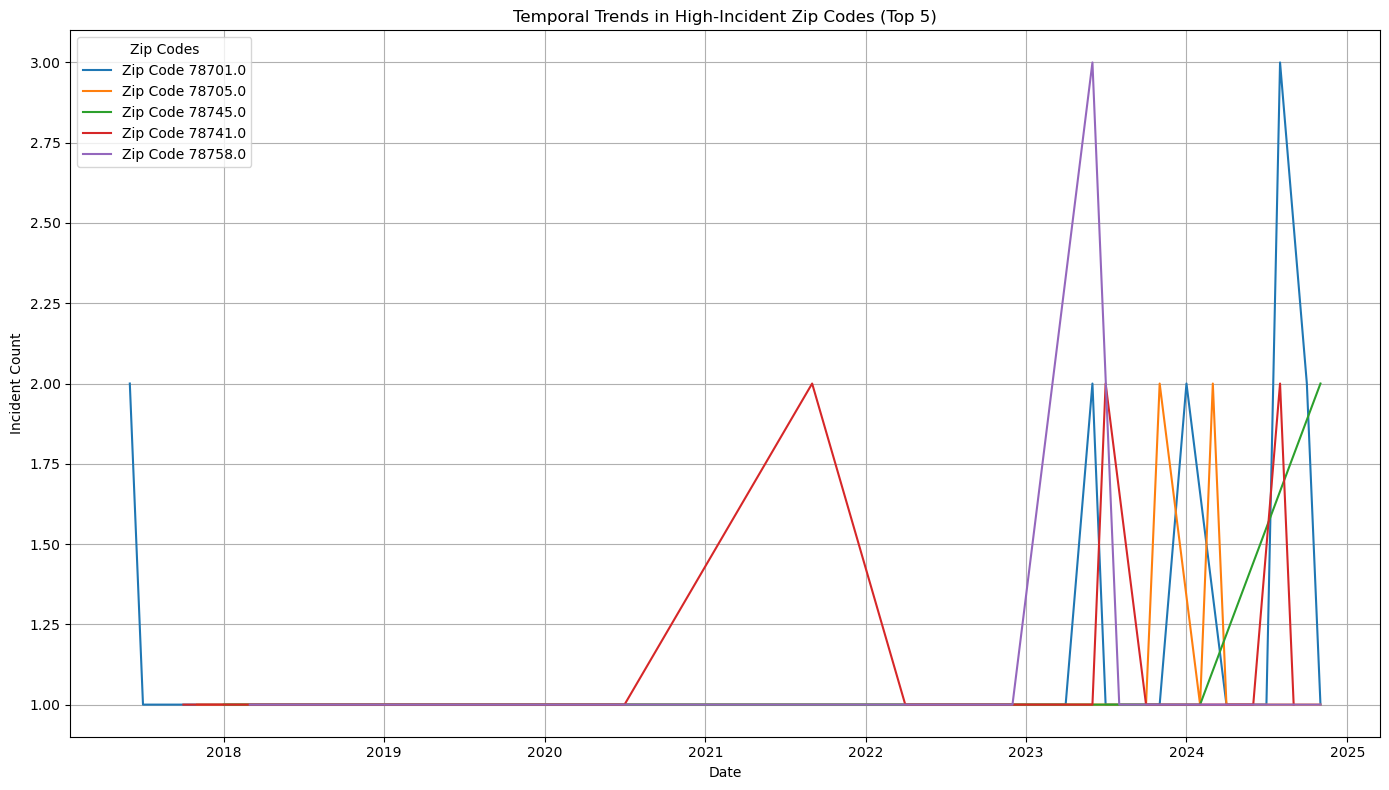

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date of Incident' is converted to datetime in the original dataset
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'], errors='coerce')

# Get top N zip codes by incident count
top_n = 5  # Adjust the number of zip codes to analyze
top_zip_codes = data['Zip Code'].value_counts().head(top_n).index.astype(str)
print(f"Top {top_n} Zip Codes:", top_zip_codes)

# Filter data for the top zip codes
filtered_data = data[data['Zip Code'].astype(str).isin(top_zip_codes)].copy()

# Explicitly modify the 'Date of Incident' column using .loc
filtered_data.loc[:, 'Date of Incident'] = pd.to_datetime(filtered_data['Date of Incident'], errors='coerce')

# Group data by zip code and month
time_series_data = filtered_data.groupby([
    'Zip Code', filtered_data['Date of Incident'].dt.to_period('M')
]).size().reset_index(name='Incident Count')
time_series_data['Date'] = time_series_data['Date of Incident'].dt.to_timestamp()

# Plot time-series trends for all selected zip codes
plt.figure(figsize=(14, 8))
for zip_code in top_zip_codes:
    subset = time_series_data[time_series_data['Zip Code'] == zip_code]
    plt.plot(subset['Date'], subset['Incident Count'], label=f"Zip Code {zip_code}")
    
plt.title(f"Temporal Trends in High-Incident Zip Codes (Top {top_n})")
plt.xlabel("Date")
plt.ylabel("Incident Count")
plt.legend(title="Zip Codes")
plt.grid(True)
plt.tight_layout()
plt.show()


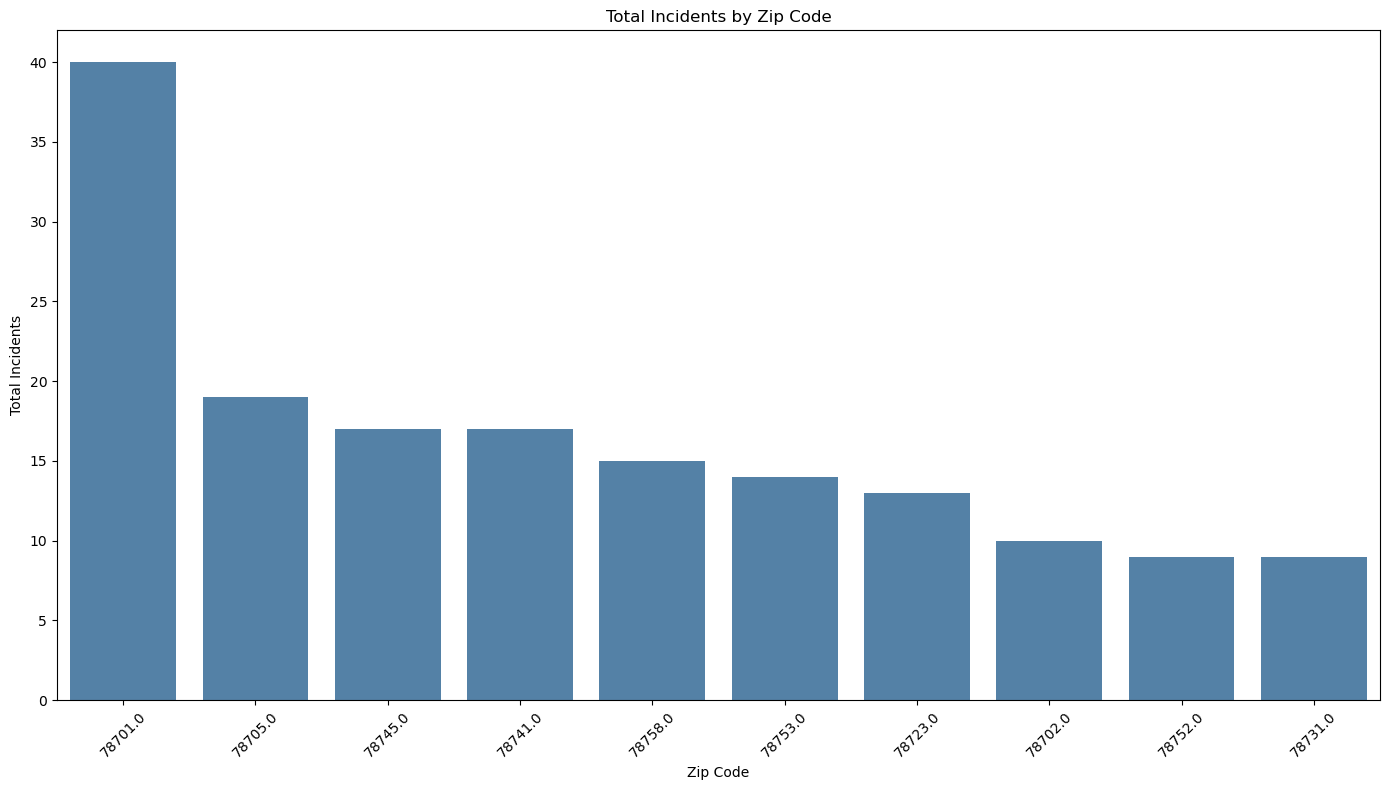

In [63]:
# Bar plot for Total Incidents by Zip Code
plt.figure(figsize=(14, 8))
sns.barplot(
    data=demographic_insights.sort_values('Total Incidents', ascending=False).head(10),
    x='Zip Code', y='Total Incidents', color='steelblue'
)
plt.title("Total Incidents by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Total Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
